In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#import data set
df=pd.read_csv(r'C:\Users\Shivam Joshi\Downloads\athlete_events\athlete_events1.csv.csv')
region_df=pd.read_csv(r'C:\Users\Shivam Joshi\Downloads\noc_regions.csv')
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [3]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
df=df[df['Season']=='Summer']

In [7]:
df.shape

(222552, 15)

In [8]:
region_df.tail()

NOC    region        notes
225  YEM     Yemen          NaN
226  YMD     Yemen  South Yemen
227  YUG    Serbia   Yugoslavia
228  ZAM    Zambia          NaN
229  ZIM  Zimbabwe          NaN

In [9]:
df=df.merge(region_df,on='NOC',how='left')

In [10]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN  

[222552 rows x 17 columns]

In [11]:
df['region'].unique()  #all countries participated

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [12]:
df.duplicated().sum()  

1385

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [16]:
pd.get_dummies(df['Medal'])

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[221167 rows x 3 columns]

In [17]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [18]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index

<bound method DataFrame.reset_index of        Gold  Silver  Bronze
NOC                        
USA  2472.0  1333.0  1197.0
URS   832.0   635.0   596.0
GBR   635.0   729.0   620.0
GER   592.0   538.0   649.0
ITA   518.0   474.0   454.0
..      ...     ...     ...
AHO     0.0     1.0     0.0
LBR     0.0     0.0     0.0
LCA     0.0     0.0     0.0
LES     0.0     0.0     0.0
LBA     0.0     0.0     0.0

[230 rows x 3 columns]>

In [19]:
df[(df['NOC']=="IND") &(df['Medal']=="GOld")].shape

(0, 20)

In [36]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','City','Games','Sport','Medal','region','Event'])

In [37]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [ ]:
medal_tally.shape

In [ ]:
medal_tally[medal_tally['NOC']=="IND"]

In [ ]:
medal_tally['Total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [ ]:
medal_tally

In [ ]:
Year=df['Year'].unique().tolist()

In [ ]:
Year.sort()

In [ ]:
Year

In [ ]:
Year.insert(0,'Overall')\


In [ ]:
Year

In [ ]:
Country=np.unique(df['region'].dropna().values).tolist()

In [ ]:
Country.sort()

In [ ]:
Country

In [ ]:
Country.insert(0,'Overall')

In [ ]:
def fetch_medal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year=='Overall' and country=='Overall':
        temp_df=medal_df
    if year=='Overall' and country!='Overall':
        flag=1
        temp_df=medal_df[medal_df['region']==country]
    if year!='Overall' and country=='Overall':
        temp_df =medal_df[medal_df['Year']==int(year)]
    if year!='Overall' and country!='Overall':
        temp_df=medal_df[(medal_df['Year']==int(year)) & (medal_df['region']==country)]
    
    if flag==1:
        x=temp_df.groupby("Year").sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False)
    x['total']= x['Gold']+x['Silver']+x['Bronze']
    
    print(x)

In [ ]:
fetch_medal_tally(df,year='2008',country='India')

In [ ]:
fetch_medal_tally(df,year='Overall',country='India')

Overall Analysis
. No. of editions
. No. of cities
. No. of events/sports
. No. of atheletes
. participating nations


In [ ]:
n_editions=df['Year'].unique()

In [ ]:
n_cities=df['City'].unique()


In [ ]:
n_events=df['Event'].unique()


In [ ]:
n_athelete=df['Name'].unique()


In [ ]:
n_country=df['region'].unique()

In [ ]:
n_sport=df['Sport'].unique()

In [26]:
nation_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')


In [27]:
nation_over_time.rename(columns={'index':'Edition','Year':'No. of countries'},inplace=True)



In [28]:
import plotly.express as px

<AxesSubplot:xlabel='Edition'>

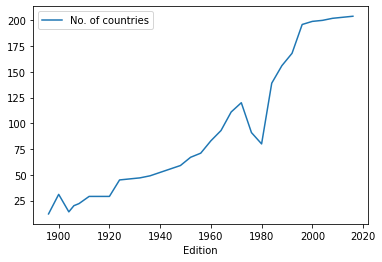

In [29]:
nation_over_time.plot(x='Edition',y='No. of countries')

In [30]:
events_over_time=df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')


In [31]:
x=df.drop_duplicates(['Year','Sport','Event'])


In [34]:
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int')

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5     0     8     8     8   
Canoeing                  0     0     0     0     0     0     0     0     0   
Cricket                   0     1     0     0     0     0     0     0     0   
Croquet                   0     3     0     0     0     0     0     0     0   
Cycling                   6     3     7     6     6     2     6     6     6   
Diving                    0     0     1     1     2     4     5     5     4   
Equestrianism             0     5     0     0     0     5     7     5     6   
Fencing                   3     7     5     8     4     5     6     7     7   
Figure Skating            0     0     0     0     4     0     3     0     0   
Football                  0     1     1     1     1     1     1     1     1   
Golf                      0     2     2     0     0     0     0     0     0   
Gymnastics                8     1    12     4     2     4     4     9     8   
Handball                  0     0     0     0     0     0     0     0     0   
Hockey                    0     0     0     0     1     0     1     0     1   
Ice Hockey                0     0     0     0     0     0     1     0     0   
Jeu De Paume              0     0     0     0     1     0     0     0     0   
Judo                      0     0     0     0     0     0     0     0     0   
Lacrosse                  0     0     1     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     1     1     1   
Motorboating              0     0     0     0     3     0     0     0     0   
Polo                      0     1     0     0     1     0     1     1     0   
Racquets                  0     0     0     0     2     0     0     0     0   
Rhythmic Gymnastics       0     0     0     0     0     0     0     0     0   
Roque                     0     0     1     0     0     0     0     0     0   
Rowing                    0     4     5     6     4     4     5     7     7   
Rugby                     0     1     0     0     1     0     1     1     0   
Rugby Sevens              0     0     0     0     0     0     0     0     0   
Sailing                   0     8     0     0     4     4    10     3     3   
Shooting                  5     8     0    12    15    18    22    10     0   
Softball                  0     0     0     0     0     0     0     0     0   
Swimming                  4     7    10     4     6     9    10    11    11   
Synchronized Swimming     0     0     0     0     0     0     0     0     0   
Table Tennis              0     0     0     0     0     0     0     0     0   
Taekwondo                 0     0     0     0     0     0     0     0     0   
Tennis                    2     4     2     4     6     8     5     5     0   
Trampolining              0     0     0     0     0     0     0     0     0   
Triathlon                 0     0     0     0     0     0     0     0     0   
Tug-Of-War                0     1     1     1     1     1     1     0     0   
Volleyball                0     0     0     0     

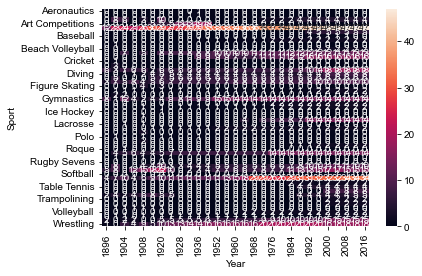

In [48]:
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)
sns.set(rc={'figure.figsize':(15,10)})

In [55]:
def most_successful(df,sport):
    temp_df=df.dropna(subset=['Medal'])
    
    if sport!='Overall':
        temp_df=temp_df[temp_df['Sport']==sport]
    return temp_df['Name'].value_counts().reset_index().merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')

In [56]:
most_successful(df,'Overall')

index  Name_x          Sport   region
0                 Michael Fred Phelps, II      28       Swimming      USA
30     Larysa Semenivna Latynina (Diriy-)      18     Gymnastics   Russia
49           Nikolay Yefimovich Andrianov      15     Gymnastics   Russia
73            Borys Anfiyanovych Shakhlin      13     Gymnastics   Russia
97                            Takashi Ono      13     Gymnastics    Japan
...                                   ...     ...            ...      ...
63079                  Joel Isasi Gonzlez       1      Athletics     Cuba
63081             Florena Andreea Isrescu       1     Gymnastics  Romania
63085                        Ryoji Isaoka       1  Weightlifting    Japan
63088                     Preben Isaksson       1        Cycling  Denmark
63090                         rpd Lengyel       1       Swimming  Hungary

[24545 rows x 4 columns]

Country wise analysis
. countrywise medal tally per year
. what countries are good in which sport
. most successful atheletes (top 10)

In [57]:
temp_df=df.dropna(subset=['Medal'])         #we have to remove those lines which have nan medal
temp_df.drop_duplicates(subset=['Team','Games','Year','City','Sport','Event','Medal'])


ID                                 Name Sex   Age  Height  Weight  \
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
12          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
13          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
15          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
16          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
...        ...                                  ...  ..   ...     ...     ...   
222486  135521                        Anton Zwerina   M  23.0     NaN    66.0   
222508  135535            Claudia Antoinette Zwiers   F  22.0   181.0    78.0   
222526  135553  Galina Ivanovna Zybina (-Fyodorova)   F  21.0   168.0    80.0   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   

                  Team  NOC        Games  Year  Season       City  \
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris   
12             Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
13             Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
15             Finland  FIN  1948 Summer  1948  Summer     London   
16             Finland  FIN  1948 Summer  1948  Summer     London   
...                ...  ...          ...   ...     ...        ...   
222486         Austria  AUT  1924 Summer  1924  Summer      Paris   
222508     Netherlands  NED  1996 Summer  1996  Summer    Atlanta   
222526    Soviet Union  URS  1952 Summer  1952  Summer   Helsinki   
222528    Soviet Union  URS  1956 Summer  1956  Summer  Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer      Tokyo   

                Sport                                   Event   Medal  \
3          Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
12           Swimming  Swimming Men's 200 metres Breaststroke  Bronze   
13           Swimming  Swimming Men's 400 metres Breaststroke  Bronze   
15         Gymnastics  Gymnastics Men's Individual All-Around  Bronze   
16         Gymnastics        Gymnastics Men's Team All-Around    Gold   
...               ...                                     ...     ...   
222486  Weightlifting         Weightlifting Men's Lightweight  Silver   
222508           Judo               Judo Women's Middleweight  Bronze   
222526      Athletics              Athletics Women's Shot Put    Gold   
222528      Athletics              Athletics Women's Shot Put  Silver   
222530      Athletics              Athletics Women's Shot Put  Bronze   

             region notes  Bronze  Gold  Silver  
3           Denmark   NaN       0     1       0  
12          Finland   NaN       1     0       0  
13          Finland   NaN       1     0       0  
15          Finland   NaN       1     0       0  
16          Finland   NaN       0     1       0  
...             ...   ...     ...   ...     ...  
222486      Austria   NaN       0     0       1  
222508  Netherlands   NaN       1     0       0  
222526       Russia   NaN       0     1       0  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  

[16047 rows x 20 columns]

In [76]:

    temp_df=df.dropna(subset=['Medal'])         #we have to remove those lines which have nan medal
    temp_df.drop_duplicates(subset=['Team','Games','Year','City','Sport','Event','Medal'],inplace=True)

    new_df=temp_df(temp_df['region']=='India')
    final_df=new_df.groupby('Year').count()['Medal'].reset_index()
   


TypeError: 'DataFrame' object is not callable

C:\Users\Shivam Joshi\anaconda3\envs\ds_project\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: 'DataFrame' object is not callable

C:\Users\Shivam Joshi\anaconda3\envs\ds_project\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Year', ylabel='Sport'>

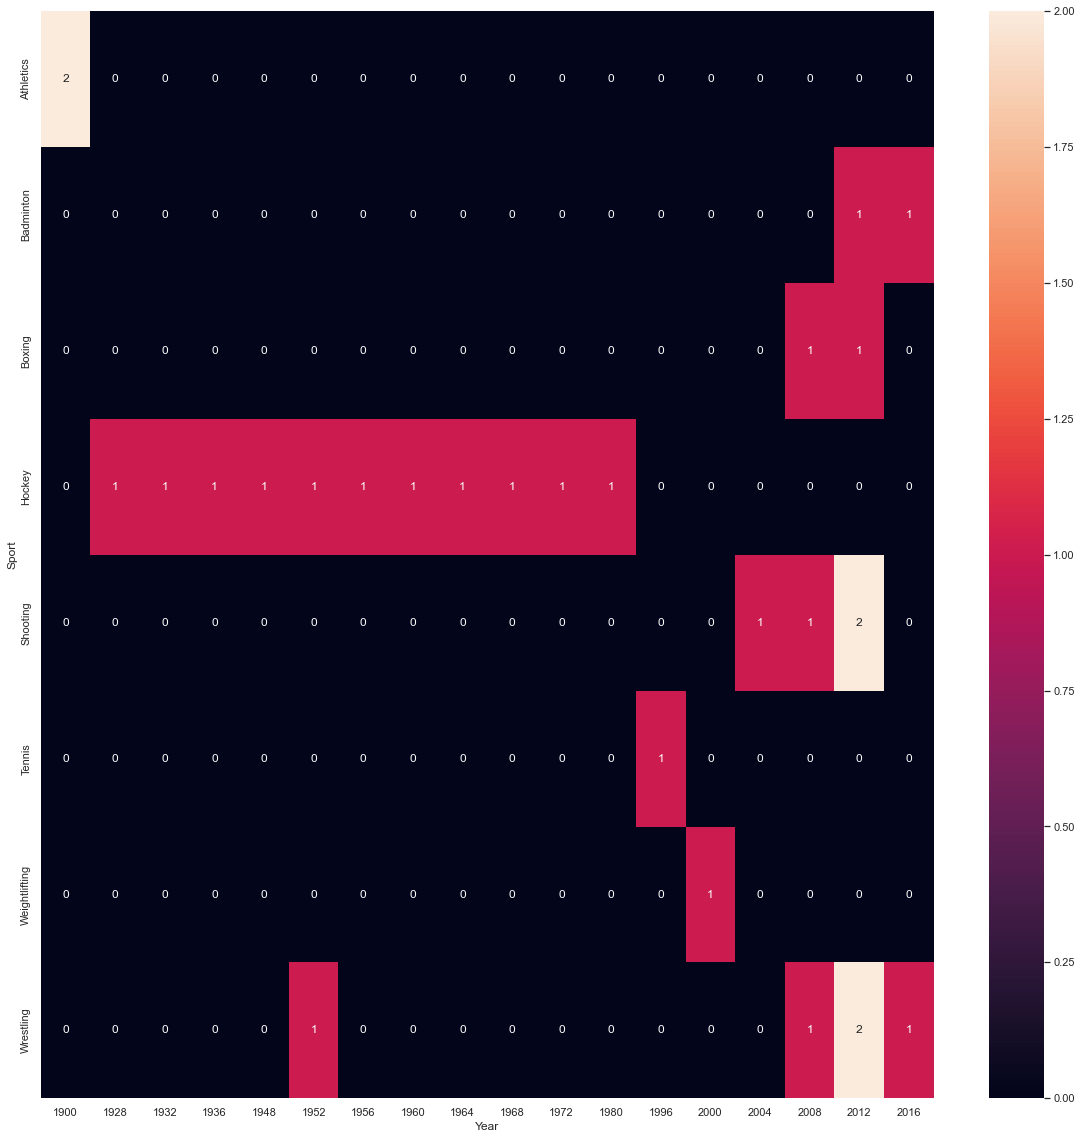

In [82]:
#heat map of sports country wise
temp_df=df.dropna(subset=['Medal'])         #we have to remove those lines which have nan medal
temp_df.drop_duplicates(subset=['Team','Games','Year','City','Sport','Event','Medal'],inplace=True)
new_df= temp_df[temp_df['region']=='India']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [89]:
def most_successful_cont(df,country):
    temp_df=df.dropna(subset=['Medal'])
    temp_df=temp_df[temp_df['Sport']==country]
    x=temp_df['Name'].value_counts().reset_index().merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index').head(10)
    x.rename(columns={'Index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [90]:
most_successful_cont(df,'India')

Empty DataFrame
Columns: [index, Medals, Sport, region]
Index: []

In [91]:
import plotly.figure_factory as ff


In [93]:
athelete_df=df.drop_duplicates(subset=['Name','region'])


In [95]:
x1=athelete_df['Age'].dropna()
x2=athelete_df[athelete_df['Medal']=='Gold']['Age'].dropna()
x3=athelete_df[athelete_df['Medal']=='Silver']['Age'].dropna()
x4=athelete_df[athelete_df['Medal']=='Bronze']['Age'].dropna()


In [107]:
fig=ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False)
fig.show()

In [108]:
famous_sports= df['Sport'].unique().tolist()

In [109]:
x=[]
name=[]
for sport in famous_sports:
    temp_df = athelete_df[athelete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)
    

In [110]:
famous_sports

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

In [111]:
fig = ff.create_distplot(x , name , show_hist= False, show_rug =False)
fig.update_layout(autosize= False,width=1000,height=600)
st.title('Distribution Of Age with respect to Sports')
st.plotly_chart(fig)

ValueError: min() arg is an empty sequence

In [112]:
athelete_df['Medal'].fillna('No medal',inplace=True)


C:\Users\Shivam Joshi\anaconda3\envs\ds_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

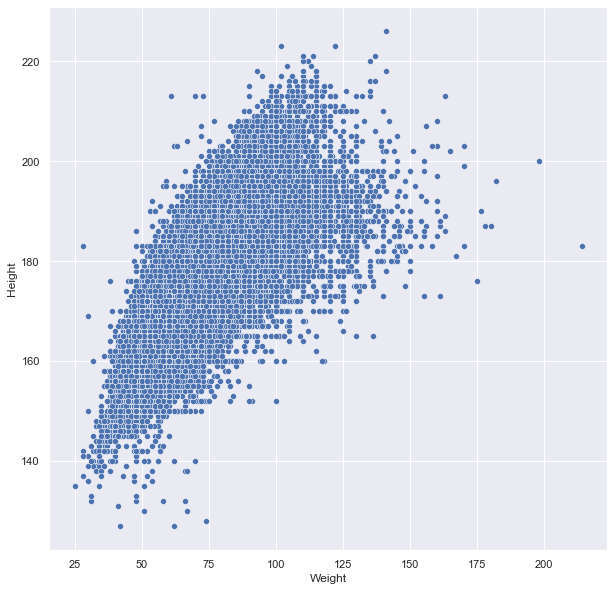

In [114]:
plt.figure(figsize=(10,10))
sns.scatterplot(athelete_df['Weight'],athelete_df['Height'])

C:\Users\Shivam Joshi\anaconda3\envs\ds_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

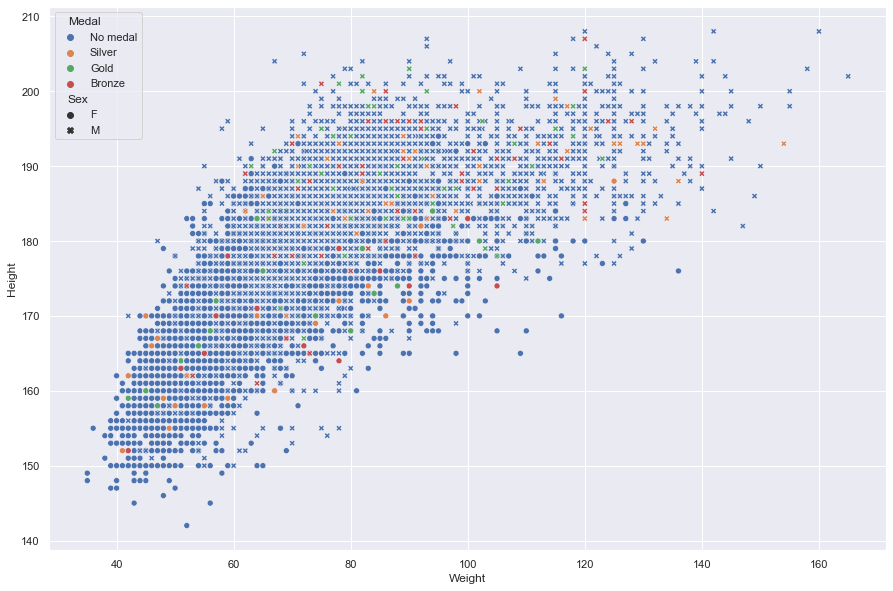

In [117]:
#graph between hwight and weight of athelitics sport
temp_df1= athelete_df[athelete_df['Sport']=='Athletics']
sns.scatterplot(temp_df1['Weight'],temp_df1['Height'],hue=temp_df['Medal'],style=temp_df['Sex'])
